In [1]:
# Package Imports
import pandas as pd
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

# Inline for displaying the plots in ipython itself, instead of opening a new window
%matplotlib inline

# Machine learning algorithm functions
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestClassifier

# Function that split data into train and validation sets
from sklearn.cross_validation import train_test_split

# Function that calculates the accuracy score of our model
from sklearn.metrics import accuracy_score


# Miscellaneous packages
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load train and test data set
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

#Check dataset dimesions
print "Training dataframe dimensions: ", train_df.shape
print "Test dataframe dimensions: ", test_df.shape

Training dataframe dimensions:  (891, 12)
Test dataframe dimensions:  (418, 11)


In [4]:
#preview the train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#preview the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print "Training dataset information:"
print train_df.info()
print "--------------------------------------------------------------------------"
print "Testing dataset information:"
print test_df.info()

Training dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------------------------------------------------------------
Testing dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float

### Removing features with more null values
As we can see, the all columns are non null except 'Age', 'Cabin', 'Embark' & 'Fare'.  'Cabin' column contains more null values than non-null values. So, dropping it from both train and test dataframes.

In [7]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

### Filling missing values
Three columns contains missing values, they are
    1. Age
    2. Embark
    3. Fare

No. of null's in 'Age' column - Training dataframe:  177 (  19.8653198653 % )
No. of null's in 'Age' column - Testing dataframe:  86 (  20.5741626794 % )


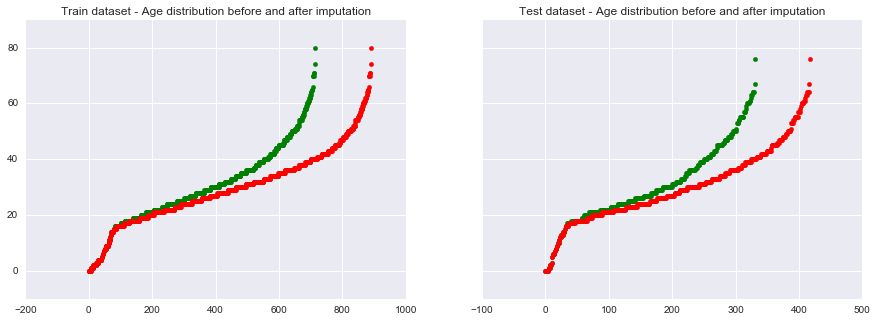

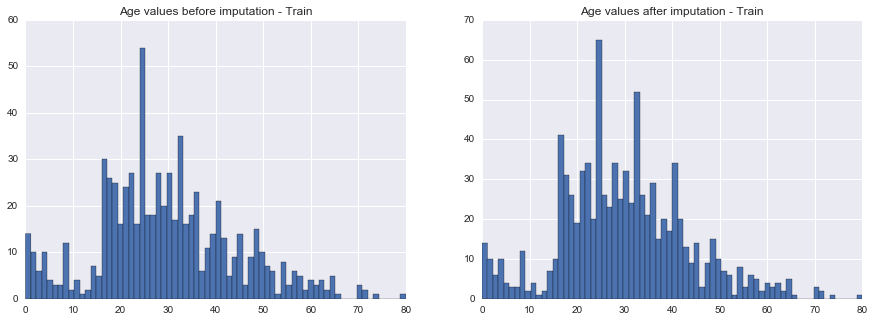

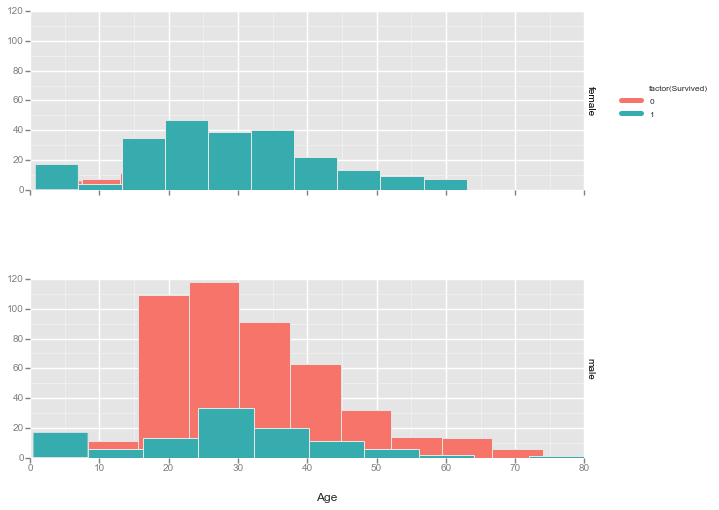

<ggplot: (16165780)>

In [8]:
#Age column
#Checking the % of data with null's
no_of_rows_in_train_df = train_df.shape[0]
no_of_rows_in_test_df = test_df.shape[0]
null_count_in_age_train_df = train_df['Age'].isnull().sum()
null_count_in_age_test_df = test_df['Age'].isnull().sum()
print "No. of null's in 'Age' column - Training dataframe: ", null_count_in_age_train_df, "( ", ((null_count_in_age_train_df/no_of_rows_in_train_df)*100), "% )"
print "No. of null's in 'Age' column - Testing dataframe: ", null_count_in_age_test_df, "( ", ((null_count_in_age_test_df/no_of_rows_in_test_df)*100), "% )"

#Calucating mean, standard deviation of Age - Training dataframe
train_mean_age = train_df['Age'].mean()
train_std_age = train_df['Age'].std()
train_age_lower_limit = train_mean_age - train_std_age
train_age_upper_limit = train_mean_age + train_std_age

#Calucating mean, standard deviation of Age - Testing dataframe
test_mean_age = test_df['Age'].mean()
test_std_age = test_df['Age'].std()
test_age_lower_limit = test_mean_age - test_std_age
test_age_upper_limit = test_mean_age + test_std_age

#Generate random numbers inbetween (mean - std) and (mean + std) to fill the missing age values
train_random_ages = np.random.randint(train_age_lower_limit, train_age_upper_limit, size = null_count_in_age_train_df)
test_random_ages = np.random.randint(test_age_lower_limit, test_age_upper_limit, size = null_count_in_age_test_df)

train_age_before_imputation = train_df['Age'].dropna().astype(int)
test_age_before_imputation = test_df['Age'].dropna().astype(int)

# fill null's values in 'Age' column with randomly generated age using mean and std
train_df['Age'][np.isnan(train_df['Age'])] = train_random_ages
test_df['Age'][np.isnan(test_df['Age'])] = test_random_ages

train_age_after_imputation = train_df['Age'].astype(int)
test_age_after_imputation = test_df['Age'].astype(int)

#Age distribution scatter plot - Train and test data (ax1 & ax2 respectively)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.scatter(range(no_of_rows_in_train_df-null_count_in_age_train_df), np.sort(train_age_before_imputation), color="green")
ax2.scatter(range(no_of_rows_in_test_df-null_count_in_age_test_df), np.sort(test_age_before_imputation), color="green")
ax1.scatter(range(no_of_rows_in_train_df), np.sort(train_age_after_imputation), color="red")
ax1.set_title("Train dataset - Age distribution before and after imputation")
ax2.scatter(range(no_of_rows_in_test_df), np.sort(test_age_after_imputation), color="red")
ax2.set_title("Test dataset - Age distribution before and after imputation")


#Age distribution histogram plot - Train data (train_axis1 - before imputation, train_axis2 -after imputation)
train_fig, (train_axis1, train_axis2) = plt.subplots(1,2,figsize=(15,5))
train_age_before_imputation.hist(bins=70, ax=train_axis1)
train_axis1.set_title('Age values before imputation - Train')
train_df['Age'].dropna().astype(int).hist(bins=70, ax=train_axis2)
train_axis2.set_title('Age values after imputation - Train')

#Age distribution histogram plot - Test data (test_axis1 - before imputation, test_axis2 -after imputation)
test_fig, (test_axis1, test_axis2) = plt.subplots(1,2,figsize=(15,5))
test_age_before_imputation.hist(bins=70, ax=test_axis1)
test_axis1.set_title('Age values before imputation - Test')
test_df['Age'].dropna().astype(int).hist(bins=70, ax=test_axis2)
test_axis2.set_title('Age values after imputation - Test')


ggplot(train_df, aes(x='Age', fill='factor(Survived)')) + geom_histogram() + facet_grid('Sex')

In [9]:
#Embark column

train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Checked w.r.t 'Ticket' column for these two entries, nothing significant found. Seems both have paid a 80.0 as Fare. Checking avg. fare of the other embark ports

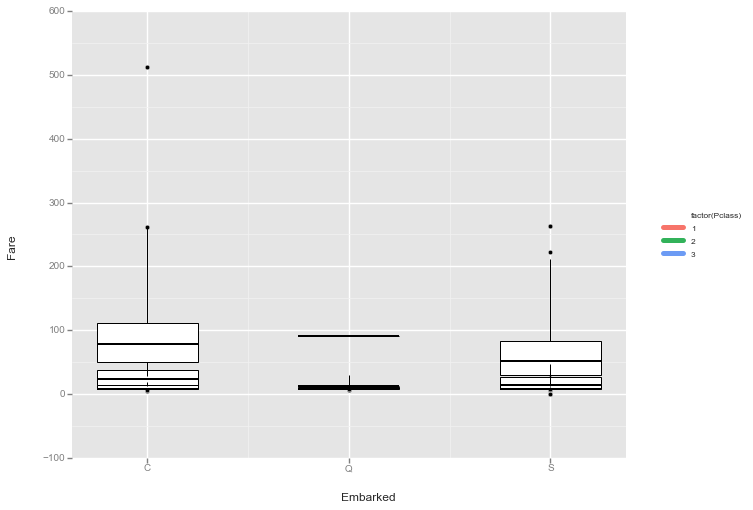

<ggplot: (15891295)>

In [10]:
rest_of_passengers_df = train_df[(train_df.PassengerId != 62) & (train_df.PassengerId != 830)]

# Box plot to compare embarkment with passenger class and fare
ggplot(rest_of_passengers_df, aes(x = 'Embarked', y = 'Fare', fill = 'factor(Pclass)')) +  geom_boxplot()

Embarkment C has an average fare near to 80 for passenger class 1. So filling null's with 'C' in Embarked column.

In [11]:
train_df['Embarked'].fillna('C', inplace=True)

In [12]:
# Fare
# A passenger in test data has 'Fare' column as null.
test_df[test_df['Fare'].isnull()]

# The passenger has travelled in passenger class 3 and embarked from 'S'. So taking median of all 
# passengers from 'S' and passenger class 3
median_fare = test_df[(test_df['Embarked']=='S') & (test_df['Pclass']==3)].Fare.median()
test_df['Fare'].fillna(median_fare, inplace=True)

In [13]:
print "Drop the remaining unwanted columns from train and test datasets: "

print "Train columns:"
print train_df.columns
print "-----------------------------------------------------------"
print "Test columns:"
print test_df.columns

Drop the remaining unwanted columns from train and test datasets: 
Train columns:
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked'],
      dtype='object')
-----------------------------------------------------------
Test columns:
Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Embarked'],
      dtype='object')


In [14]:
test_passenger_ids = test_df['PassengerId']

# Dropping the unwanted columns for model building
columns_to_drop = ['Name', 'PassengerId', 'Ticket']
train_df.drop(['Name', 'PassengerId', 'Ticket'], inplace=True, axis=1)

Convert all categorical variables into numerical before model building

In [15]:
# Removing 'Sex' categorical column and creating numerical columns
train_num_sex  = pd.get_dummies(train_df['Sex'])
train_num_sex.columns = ['Female','Male']

test_num_sex  = pd.get_dummies(test_df['Sex'])
test_num_sex.columns = ['Female','Male']

train_df = train_df.join(train_num_sex)
test_df = test_df.join(test_num_sex)

train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# Removing passenger class categorical column and creating dummy columns with numerical values
train_num_pclass  = pd.get_dummies(train_df['Pclass'])
train_num_pclass.columns = ['1st class','2nd class','3rd class']

test_num_pclass  = pd.get_dummies(test_df['Pclass'])
test_num_pclass.columns = ['1st class','2nd class','3rd class']

train_df = train_df.join(train_num_pclass)
test_df    = test_df.join(test_num_pclass)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

# Removing 'Embarked' categorical column and adding 'S', 'C' and 'Q' numerical columns
embark_dummies_titanic  = pd.get_dummies(train_df['Embarked'])
embark_dummies_test  = pd.get_dummies(test_df['Embarked'])

train_df = train_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

train_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [16]:
train_df.columns

Index([u'Survived', u'Age', u'SibSp', u'Parch', u'Fare', u'Female', u'Male',
       u'1st class', u'2nd class', u'3rd class', u'C', u'Q', u'S'],
      dtype='object')

In [17]:
train_x = train_df.drop("Survived",axis=1)
train_y = train_df["Survived"]
test_x = test_df.drop(columns_to_drop, axis=1)

### Train and validation split

Instead of training our Machine learning algorithm with the whole training dataset, its recommended to split the training data set into two parts, namely model building data and validation data.

Testing our model with the validation data set provides an rough estimate about the performance of our model

In [18]:
# Model building data and validation data split
model_data_x, validation_data_x, model_data_y, validation_data_y = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

# Initialize Logistics regression
clf = lm.LogisticRegression()

# Model building
clf.fit(model_data_x, model_data_y)

# Predict on the validation data
predicted_y_from_validation_data = clf.predict(validation_data_x)

In [ ]:
accuracy_score(validation_data_y, predicted_y_from_validation_data)

In [19]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(model_data_x, model_data_y)
predicted_y_from_validation_data = random_forest.predict(validation_data_x)
#random_forest.score(train_x, train_y)

In [ ]:
accuracy_score(validation_data_y, predicted_y_from_validation_data)

In [20]:
predictions = clf.predict(test_x)

In [21]:
predictions = random_forest.predict(test_x)

In [ ]:
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("submission.csv", index=False)